In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# solve LP
m = GEKKO(remote=False)
x1,x2 = m.Array(m.Var,2,lb=0)
m.Equations([2*x1-3*x2<=6,3*x1-2*x2>=-6,-x1-x2<=-8,-x1-x2>=-18,x1>=0,x2>=4])
m.Maximize(x1/2+x2)
m.solve(disp=False)
x1opt = x1.value[0]; x2opt = x2.value[0]
print('x1 = ',round(x1opt,2))
print('x2 = ',round(x2opt,2))
print('z = ',round(x1opt/2+x2opt,3))

x1 =  6.0
x2 =  12.0
z =  15.0


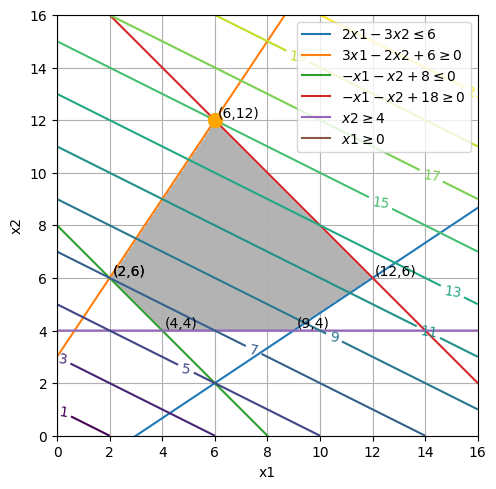

In [8]:
# visualize solution
g = np.linspace(0,16,200)
x,y = np.meshgrid(g,g)
obj = x/2+y
plt.imshow(((2*x-3*y<=6)&(3*x-2*y>=-6)&(-x-y<=-8)&(-x-y>=-18)&(x>=0)&(y>=4)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 16, 2000)
y0 = -2+(2/3)*x0   # 6*x+4*y<=24
y1 = 3+1.5*x0   # x+2*y<=6
y2 = 8 - x0      # -x+y<=1
y3 = 18 -x0 # y <= 2
y4 = 4*np.ones_like(x0)

plt.plot(x0, y0, label=r'$2x1-3x2\leq6$')
plt.plot(x0, y1, label=r'$3x1-2x2+6\geq0$')
plt.plot(x0, y2, label=r'$-x1-x2+8\leq0$')
plt.plot(x0, y3, label=r'$-x1-x2+18\geq0$')
plt.plot(x0, y4, label=r'$x2\geq4$')
plt.plot([0,0],[0,16], label=r'$x1\geq0$')
xv = [2,round(x1opt),12,9,4,2]; yv = [6,round(x2opt),6,4,4,6]
#plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(1,22,2))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([x1opt],[x2opt],marker='o',color='orange',markersize=10)
plt.xlim(0,16); plt.ylim(0,16); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x1'); plt.ylabel('x2')
plt.savefig('plot.png',dpi=300)
plt.show()

In [9]:
# solve LP
m = GEKKO(remote=False)
x1,x2 = m.Array(m.Var,2,lb=0)
m.Equations([2*x1-3*x2<=6,3*x1-2*x2>=-6,-x1-x2<=-8,-x1-x2>=-18,x1>=0,x2>=4])
m.Maximize(2*x1+x2)
m.solve(disp=False)
x1opt = x1.value[0]; x2opt = x2.value[0]
print('x1 = ',round(x1opt,2))
print('x2 = ',round(x2opt,2))
print('z = ',round(2*x1opt+x2opt,3))

x1 =  12.0
x2 =  6.0
z =  30.0


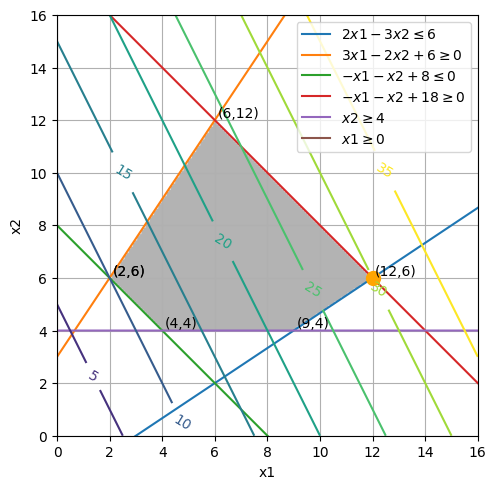

In [14]:
# visualize solution
g = np.linspace(0,16,200)
x,y = np.meshgrid(g,g)
obj = 2*x+y
plt.imshow(((2*x-3*y<=6)&(3*x-2*y>=-6)&(-x-y<=-8)&(-x-y>=-18)&(x>=0)&(y>=4)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 16, 2000)
y0 = -2+(2/3)*x0   # 6*x+4*y<=24
y1 = 3+1.5*x0   # x+2*y<=6
y2 = 8 - x0      # -x+y<=1
y3 = 18 -x0 # y <= 2
y4 = 4*np.ones_like(x0)

plt.plot(x0, y0, label=r'$2x1-3x2\leq6$')
plt.plot(x0, y1, label=r'$3x1-2x2+6\geq0$')
plt.plot(x0, y2, label=r'$-x1-x2+8\leq0$')
plt.plot(x0, y3, label=r'$-x1-x2+18\geq0$')
plt.plot(x0, y4, label=r'$x2\geq4$')
plt.plot([0,0],[0,16], label=r'$x1\geq0$')
xv = [2,6,round(x1opt),9,4,2]; yv = [6,12,round(x2opt),4,4,6]
#plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(0,40,5))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([x1opt],[x2opt],marker='o',color='orange',markersize=10)
plt.xlim(0,16); plt.ylim(0,16); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x1'); plt.ylabel('x2')
plt.savefig('plot.png',dpi=300)
plt.show()